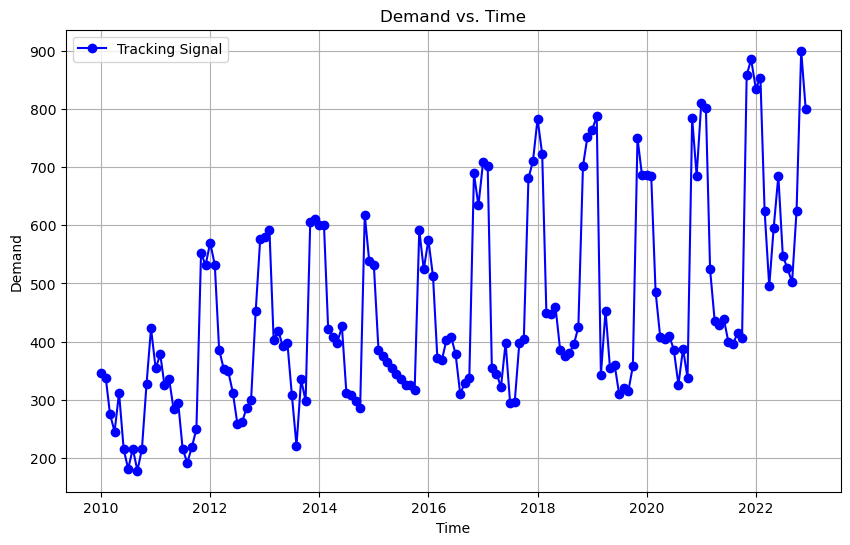

We can see that the Demand Data is having Seasonality as well as Trend so I am applying Winter's Method to Forecast the Demand


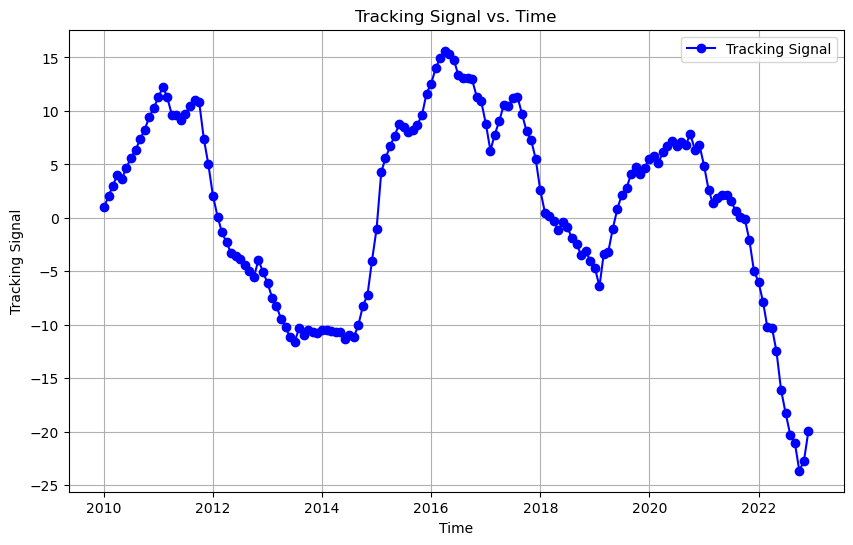

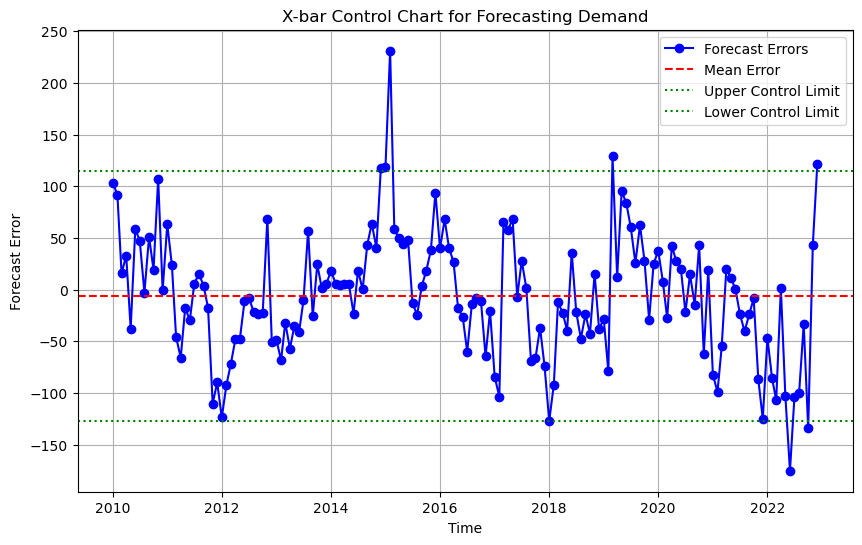

,No.,Month,Demand,MA,Deseaonalized Demand,Seasonal Factor,SF,Level,Trend,Forecast,Deviation,Absolute Deviation,MADi,MSEi,Deviation %,MAPEi,Tracking Signal i
0,1,2010-01-01,346,NaN,317.499023,1.089767,1.415674,313.844402,1.306304,449.474997,103.474997,103.474997,103.474997,10707.075035,29.906069,29.906069,1.000000
1,2,2010-02-01,338,NaN,319.170789,1.058994,1.363791,311.785098,0.969743,429.799716,91.799716,91.799716,97.637356,9567.131407,27.159679,13.579840,2.000000
2,3,2010-03-01,276,NaN,320.842555,0.860235,0.932560,311.915081,0.885767,291.662531,15.662531,15.662531,70.312415,6459.859231,5.674830,1.891610,3.000000
3,4,2010-04-01,245,NaN,322.514321,0.759656,0.888540,310.947472,0.700430,277.935977,32.935977,32.935977,60.968305,5116.089066,13.443256,3.360814,4.000000
4,5,2010-05-01,312,NaN,324.186087,0.962410,0.880608,313.780535,0.913693,274.439712,-37.560288,37.560288,56.286702,4375.026305,12.038554,2.407711,3.665394
5,6,2010-06-01,215,NaN,325.857853,0.659797,0.870621,311.307021,0.574972,273.979480,58.979480,58.979480,56.735498,4225.618430,27.432316,4.572053,4.675951
6,7,2010-07-01,181,273.000000,327.529620,0.552622,0.730493,308.676789,0.254452,227.827580,46.827580,46.827580,55.320081,3935.218977,25.871591,3.695942,5.642074
7,8,2010-08-01,216,275.000000,329.201386,0.656133,0.690089,309.134834,0.274811,213.190059,-2.809941,2.809941,48.756314,3444.303576,1.300898,0.162612,6.344000
8,9,2010-09-01,178,278.708333,330.873152,0.537971,0.740172,305.963388,-0.069815,229.016486,51.016486,51.016486,49.007444,3350.790055,28.660947,3.184550,7.352486
9,10,2010-10-01,215,284.541667,332.544918,0.646529,0.766023,304.632418,-0.195930,234.321471,19.321471,19.321471,46.038847,3053.042972,8.986731,0.898673,8.246254


In [8]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 156)
pd.set_option('display.max_columns',20)

# Importing dataset

dataset1 = pd.read_excel("Book2.xlsx", sheet_name='Sheet1')
dataset = dataset1.copy()

# Plotting Dataset to check for stationarity, trend, seasonality

A = dataset["Demand"]
B = dataset["Month"]
plt.figure(figsize=(10, 6))
plt.plot(B, A, marker='o', linestyle='-', color='b', label='Tracking Signal')
plt.xlabel('Time')
plt.ylabel('Demand')
plt.title('Demand vs. Time')
plt.legend()
plt.grid()
plt.show()

print("We can see that the Demand Data is having Seasonality as well as Trend so I am applying Winter's Method to Forecast the Demand")
# Deseasonalized Data

dataset['MA'] = np.nan
for i in range(dataset.shape[0]-24):
    idx = list(range(i + 1, i + 12))
    if i + 13 < dataset.shape[0]:  # Check if the index is within bounds
        dataset.loc[i + 6, "MA"] = (dataset.loc[i, 'Demand'] + dataset.loc[i + 12, 'Demand'] +2* np.sum(dataset.loc[idx, 'Demand']))/24
    else:
        dataset.loc[i + 6, "MA"] = (dataset.loc[i, 'Demand'] +2* np.sum(dataset.loc[idx, 'Demand']))/24


# Finding Lo and To for the deseasonalised data using Linear Regression

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
X = np.array(range(7,139)).reshape(-1, 1)
y = np.array(dataset.loc[range(6, 138), 'Demand']).reshape(-1, 1)
regressor.fit(X, y)

# Initializing some variables for Forecasting using Winter's Method

Lo = regressor.intercept_[0]
To = regressor.coef_[0][0]
alpha = 0.05
beta = 0.1
gamma = 0.1

# Finding the Level, Trend and Seasonal Factors for the Demand Data

dataset["Deseaonalized Demand"] = Lo + To*dataset['No.']
dataset["Seasonal Factor"] = dataset["Demand"]/dataset["Deseaonalized Demand"]

for i in range(12):
    idx = range(i,dataset.shape[0],12)
    dataset.loc[i, 'SF'] = np.average(dataset.loc[idx, 'Seasonal Factor'])

for i in range(dataset.shape[0]):
    if i==0:
        dataset.loc[i, "Level"] = alpha*(dataset.loc[i, "Demand"]/dataset.loc[i, "SF"]) + (1-alpha)*(Lo+To)
        dataset.loc[i, "Trend"] = beta*(dataset.loc[i, "Level"] - Lo) + (1-beta)*(To)
    elif i<=11:
        dataset.loc[i, "Level"] = alpha*(dataset.loc[i, "Demand"]/dataset.loc[i, "SF"]) + (1-alpha)*(dataset.loc[i-1, "Level"] + dataset.loc[i-1, "Trend"])
        dataset.loc[i, "Trend"] = beta*(dataset.loc[i, "Level"] - dataset.loc[i-1, "Level"]) + (1-beta)*(dataset.loc[i-1, "Trend"])
    if i>11:
        dataset.loc[i, "Level"] = alpha*(dataset.loc[i, "Demand"]/dataset.loc[i-12, "SF"]) + (1-alpha)*(dataset.loc[i-1, "Level"] + dataset.loc[i-1, "Trend"])
        dataset.loc[i, "Trend"] = beta*(dataset.loc[i, "Level"] - dataset.loc[i-1, "Level"]) + (1-beta)*(dataset.loc[i-1, "Trend"])
        dataset.loc[i, "SF"] = gamma*(dataset.loc[i, "Demand"]/dataset.loc[i, "Level"]) + (1-gamma)*(dataset.loc[i-12, "SF"])
        
# Forecast the Demand and finding Deviation, Absolute Deviation

dataset.loc[0, "Forecast"] = (Lo + To)*dataset.loc[0, "SF"]
for i in range(1, dataset.shape[0]):
    dataset.loc[i, "Forecast"] = (dataset.loc[i-1, "Level"] + dataset.loc[i-1, "Trend"])*dataset.loc[i, "SF"]
    
dataset["Deviation"] = dataset["Forecast"] - dataset["Demand"]
dataset["Absolute Deviation"] = np.abs(dataset["Deviation"])

# Compute MAD, MSE, Deviation %, MAPE and Tracking Signal

for i in range(dataset.shape[0]):
    dataset.loc[i, "MADi"] = (dataset.loc[:i, "Absolute Deviation"]).sum()/(i+1)
    dataset.loc[i, "MSEi"] = (dataset.loc[:i, "Deviation"]**2).sum()/(i+1)
    dataset.loc[i, "Deviation %"] = (dataset.loc[i, "Absolute Deviation"]/dataset.loc[i, "Demand"])*100
    dataset.loc[i, "MAPEi"] = dataset.loc[i ,"Deviation %"].sum()/(i+1)
    dataset.loc[i, "Tracking Signal i"] = (dataset.loc[:i, "Deviation"].sum())/dataset.loc[i, "MADi"]
    
    
# Plotting the Tracking Signal Vs. Time Chart to monitor the accuracy and performance of the forecast model

A = dataset["Tracking Signal i"]
B = dataset["Month"]
plt.figure(figsize=(10, 6))
plt.plot(B, A, marker='o', linestyle='-', color='b', label='Tracking Signal')
plt.xlabel('Time')
plt.ylabel('Tracking Signal')
plt.title('Tracking Signal vs. Time')
plt.legend()
plt.grid()
plt.show()

# Plotting Control Chart of X-bar of the Forecast Error/Deviation

forecast_errors = dataset["Deviation"]
mean_error = np.mean(forecast_errors)
std_deviation = np.std(forecast_errors)

# Set control limits (mean +/- 2 times standard deviation)
upper_control_limit = mean_error + 2 * std_deviation
lower_control_limit = mean_error - 2 * std_deviation

plt.figure(figsize=(10, 6))
plt.plot(dataset["Month"], forecast_errors, marker='o', linestyle='-', color='b', label='Forecast Errors')
plt.axhline(y=mean_error, color='r', linestyle='--', label='Mean Error')
plt.axhline(y=upper_control_limit, color='g', linestyle=':', label='Upper Control Limit')
plt.axhline(y=lower_control_limit, color='g', linestyle=':', label='Lower Control Limit')
plt.xlabel('Time')
plt.ylabel('Forecast Error')
plt.title('X-bar Control Chart for Forecasting Demand')
plt.legend()
plt.grid()
plt.show()

# Final Dataset with all the computed values
dataset